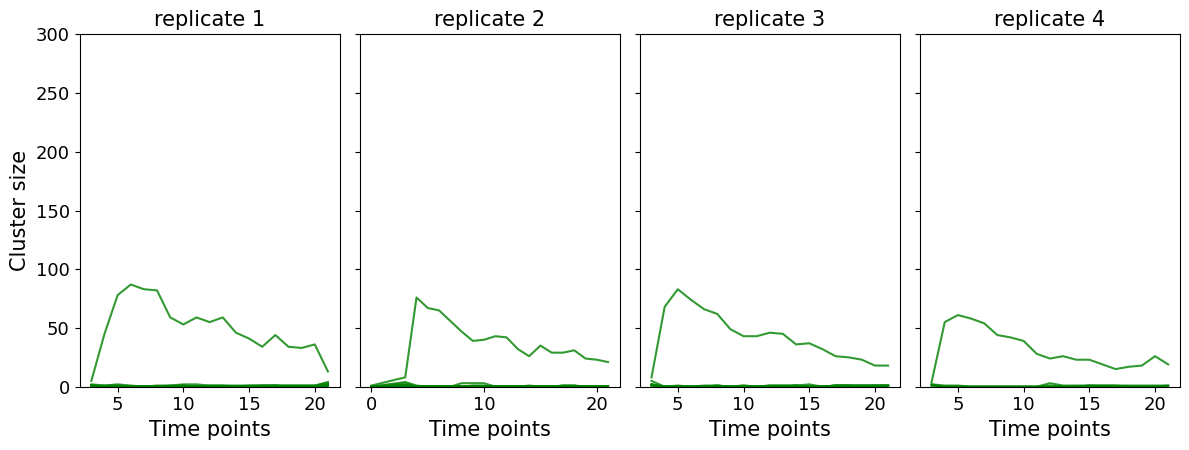

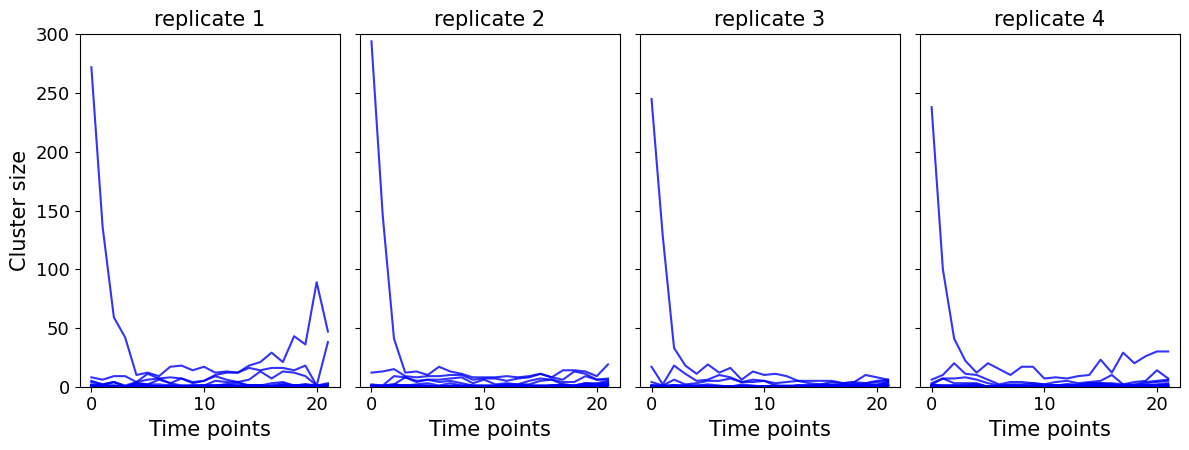

In [1]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataframe
def load_dataframe(filename='data_clustered'):
    with open(f'{filename}.pkl', 'rb') as f:
        loaded = pickle.load(f)
    return loaded['df']

def plot_cluster_size_per_rep(df, experiment_type, color, font_size=15):
    # Select relevant slices for the 900 cells, 1:1 ratio case for the given experiment type
    filtered_df = df[
        (df['n_cells'] == 900) &
        (df['ratio'] == '1:1') &
        (df['experiment'] == experiment_type)
    ]

    # Set up the figure with 4 subplots for each replicate
    fig, axes = plt.subplots(1, 4, figsize=(12, 5), sharey=True)
    # fig.suptitle(f'{experiment_type.capitalize()} system', fontsize=font_size + 5, fontweight='bold')

    # Iterate over each replicate and plot the cluster sizes over time
    for i, rep in enumerate(filtered_df['rep'].unique()):
        rep_df = filtered_df[filtered_df['rep'] == rep]
        cluster_sizes = rep_df.groupby(['t', 'cluster']).size().unstack(fill_value=0)

        # Sort clusters by their size at each time point to avoid crossing lines
        cluster_sizes = cluster_sizes.apply(lambda row: pd.Series(sorted(row, reverse=True), index=cluster_sizes.columns), axis=1)

        # Plot each cluster size over time for the given replicate
        for cluster_id in cluster_sizes.columns:
            axes[i].plot(cluster_sizes.index, cluster_sizes[cluster_id], color=color, alpha=0.8)
        axes[i].set_title(f'replicate {rep}', fontsize=font_size)
        axes[i].set_xlabel('Time points', fontsize=font_size)
        axes[i].tick_params(axis='both', which='major', labelsize=font_size - 2)
        # axes[i].set_yscale('log')  # Set y-axis to log scale

    # Shared y-axis label
    axes[0].set_ylabel('Cluster size', fontsize=font_size)
    axes[0].set_ylim([0,300])
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Load dataframe
df = load_dataframe()

# Plot cluster sizes for induced and constitutive systems
plot_cluster_size_per_rep(df, experiment_type='induced', color='green')
plot_cluster_size_per_rep(df, experiment_type='constitutive', color='blue')
